<a href="https://colab.research.google.com/github/YashasTodi/Solar-Panel-Fault-Detection-system/blob/main/Solar_Panel_Fault_detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!kaggle datasets download -d pythonafroz/solar-panel-images
!unzip solar-panel-images.zip -d /content/solar-panel-images

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/solar-panel-images
License(s): unknown
 99% 303M/305M [00:04<00:00, 113MB/s]
100% 305M/305M [00:04<00:00, 67.4MB/s]
Archive:  solar-panel-images.zip
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (1).jpeg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (10).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (100).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (101).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (102).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (103).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (104).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (105).jpg  
  inflating: /content/solar-panel-images/Faulty_solar_panel/Bird-drop/Bird (106).jpg  
  inflating: 

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!pip install opencv-python

In [4]:
import os
import numpy as np
import cv2

def load_images_from_folder(base_path):
    images = []
    labels = []
    classes = os.listdir(base_path)

    for class_name in classes:
        class_path = os.path.join(base_path, class_name)
        if not os.path.isdir(class_path):
            continue
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(class_name)


    return np.array(images), labels

In [5]:
base_path = '/content/solar-panel-images/Faulty_solar_panel'
images, labels = load_images_from_folder(base_path)


In [6]:
images.shape

(869, 224, 224, 3)

In [7]:

from skimage.color import rgb2gray
grayscale_images = []
for img in images:
  grayscale = rgb2gray(img)
  grayscale_images.append(grayscale)
grayscale_images = np.array(grayscale_images)


In [8]:
print(grayscale_images)

[[[0.49034588 0.49034588 0.49398471 ... 0.51078706 0.51022157 0.50742392]
  [0.49034588 0.49034588 0.49398471 ... 0.5133098  0.51302706 0.50742392]
  [0.49034588 0.49315137 0.4967902  ... 0.51191098 0.51191098 0.50687333]
  ...
  [0.13276431 0.13276431 0.13276431 ... 0.21385059 0.1892051  0.14915608]
  [0.08375608 0.11484588 0.05742118 ... 0.20153529 0.18473294 0.14943882]
  [0.06022667 0.12268902 0.03447216 ... 0.20909569 0.19257608 0.1334698 ]]

 [[0.78196157 0.76739137 0.77131294 ... 0.80743255 0.80351098 0.82704039]
  [0.76875255 0.75306627 0.76090941 ... 0.78387333 0.77995176 0.81215765]
  [0.76007608 0.74719529 0.75503843 ... 0.77127529 0.77127529 0.79480471]
  ...
  [0.70691608 0.80607137 0.71225137 ... 0.80102588 0.77749647 0.46377098]
  [0.81082627 0.74023804 0.67554353 ... 0.70208588 0.70937843 0.83263647]
  [0.79906157 0.74415961 0.69907294 ... 0.73011725 0.75003059 0.75311882]]

 [[0.11728118 0.09767333 0.13688902 ... 0.82525216 0.82525216 0.85270314]
  [0.13296745 0.109438

In [9]:
x = grayscale_images #x=represents input data(images) y= labels
y= labels

In [10]:
print(y)

['Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-Covered', 'Snow-C

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
print(y_numeric)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 1 1 1 1 1 1 1 

In [14]:

from sklearn.model_selection import train_test_split
x_flattened = x.reshape(x.shape[0], -1)
x_train, x_test, y_train, y_test = train_test_split(x_flattened, y_numeric, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(x_train, y_train)
clf.score(x_test, y_test)
print(clf.score(x_test, y_test))
from sklearn.metrics import precision_score
y_pred = clf.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

0.5287356321839081
Precision: 0.5324758662317824
Recall: 0.5287356321839081
F1 Score: 0.524962756490875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


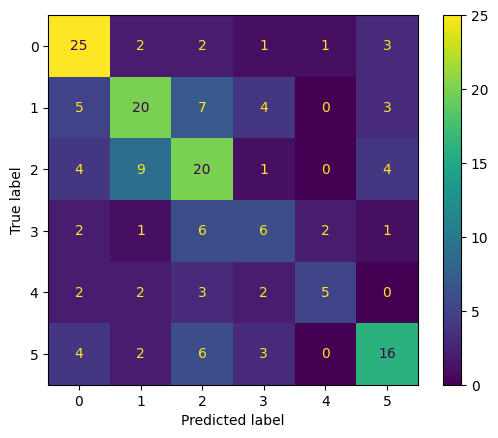

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

In [17]:

from sklearn.linear_model import RidgeClassifier
clf1 = RidgeClassifier(random_state=42).fit(x_train, y_train)
clf1.score(x_test, y_test)
print(clf1.score(x_test, y_test))
from sklearn.metrics import precision_score
y_pred = clf1.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

0.5689655172413793
Precision: 0.5922459886295043
Recall: 0.5689655172413793
F1 Score: 0.5667275263810335


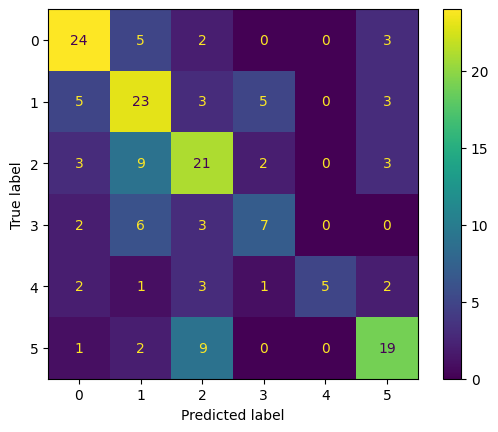

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf1, x_test, y_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
regr.score(x_test, y_test)
print(regr.score(x_test, y_test))
from sklearn.metrics import precision_score
y_pred = regr.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

0.4942528735632184
Precision: 0.4618895280281358
Recall: 0.4942528735632184
F1 Score: 0.4453909525894284


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


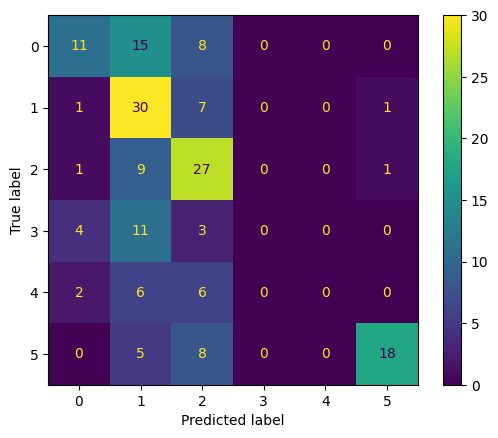

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(regr, x_test, y_test)

In [21]:

from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
clf2.score(x_test, y_test)
print(clf2.score(x_test, y_test))
from sklearn.metrics import precision_score
y_pred = clf2.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


0.4827586206896552
Precision: 0.5020811168825751
Recall: 0.4827586206896552
F1 Score: 0.48119391435564274


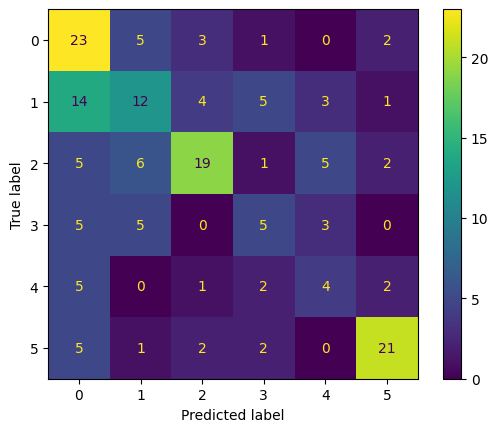

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf2, x_test, y_test)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf3.fit(x_train, y_train)

clf3.score(x_test, y_test)
print(clf3.score(x_test, y_test))
from sklearn.metrics import precision_score
y_pred = clf3.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

0.6264367816091954
Precision: 0.6859477772211554
Recall: 0.6264367816091954
F1 Score: 0.620723366816842


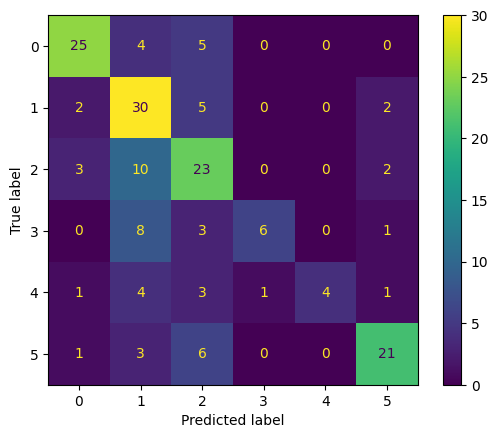

In [24]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf3, x_test, y_test)





In [25]:
!pip install tensorflow numpy mnist

In [26]:
import tensorflow as tf
from tensorflow import keras
x_train, x_test, y_train, y_test = train_test_split(np.array(images), y_numeric, test_size=0.2, random_state=42)
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(128,activation=tf.nn.relu))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))



4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
keras_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
keras_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 701ms/step - accuracy: 0.4222 - loss: 4.2087 - val_accuracy: 0.6264 - val_loss: 0.9999
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8478 - loss: 0.4360 - val_accuracy: 0.7701 - val_loss: 0.6851
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9548 - loss: 0.1309 - val_accuracy: 0.7989 - val_loss: 0.6973
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9823 - loss: 0.0662 - val_accuracy: 0.7989 - val_loss: 0.6390
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9883 - loss: 0.0417 - val_accuracy: 0.8161 - val_loss: 0.6603
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9987 - loss: 0.0172 - val_accuracy: 0.8103 - val_loss: 0.6648
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9848 - loss: 0.0307 - val_accuracy: 0.8276 - val_loss: 0.6293
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9954 - loss: 0.0232 - val_accuracy: 0.8046 -

In [46]:
#Predict
from sklearn.metrics import confusion_matrix
y_prediction = keras_model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
#y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
print(y_prediction)
print(y_test)
result = confusion_matrix(y_test, y_prediction , normalize='pred')



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[1 5 1 5 2 2 5 2 2 4 0 4 3 0 4 0 4 2 0 2 1 3 3 1 4 0 5 5 5 2 4 1 2 2 2 0 2
 2 2 1 2 5 0 5 2 0 0 1 2 2 0 2 2 2 0 2 1 0 1 0 1 5 5 2 1 2 0 1 3 1 3 0 2 2
 5 0 1 0 0 2 3 2 2 0 3 2 3 3 0 0 3 0 0 0 2 1 5 1 1 1 5 0 1 2 5 2 3 1 2 5 1
 2 1 5 4 3 5 0 1 1 2 2 3 2 2 0 4 2 5 0 2 1 0 5 5 0 5 0 4 0 0 2 3 5 5 0 0 0
 2 1 2 1 1 5 1 4 0 3 2 3 5 1 1 2 1 1 0 1 3 5 4 3 2 3]
[3 5 1 5 2 2 5 2 1 4 0 4 3 0 4 0 4 2 0 1 0 3 3 1 4 0 5 5 5 2 2 3 2 2 2 4 2
 5 2 1 2 2 4 5 1 0 0 1 2 2 0 2 2 2 0 2 1 0 1 0 1 5 5 2 1 2 0 1 3 1 0 2 5 2
 5 0 1 0 0 2 3 1 2 0 3 2 3 1 0 0 1 0 0 4 1 1 5 2 1 1 5 0 1 2 5 2 4 1 2 5 3
 2 1 4 4 3 5 0 1 1 1 2 3 2 2 0 4 5 5 0 2 1 0 5 5 0 5 0 4 0 0 1 3 5 5 4 0 0
 5 1 2 1 1 5 5 5 0 3 2 3 5 1 1 5 1 1 2 1 3 5 1 3 1 3]


In [33]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(8, 3, input_shape=(224, 224, 3)),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(16, 3),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(24, 3),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(32, 3),
  MaxPooling2D(pool_size=pool_size),
  Conv2D(64, 3),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(6, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0002)
model.compile(
  optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)



In [38]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(
  x_train,
  to_categorical(y_train),
  epochs=20,
  validation_data=(x_test, to_categorical(y_test)),
  callbacks=[checkpoint, early_stopping] # Use the defined callbacks
)

(695, 224, 224, 3)
(174, 224, 224, 3)
(695,)
(174,)
Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 653ms/step - accuracy: 0.8745 - loss: 0.4363 - val_accuracy: 0.5172 - val_loss: 4.0206
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9108 - loss: 0.2407 - val_accuracy: 0.5057 - val_loss: 3.5607
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9833 - loss: 0.0450 - val_accuracy: 0.5287 - val_loss: 3.6195
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9756 - loss: 0.0730 - val_accuracy: 0.5287 - val_loss: 3.4914
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9888 - loss: 0.0459 - val_accuracy: 0.5172 - val_loss: 3.6249
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9910 - loss: 0.0359 - val_accuracy: 0.5115 - val_loss: 3.5479
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9949 - loss: 0.0312 - val_accuracy: 0.5287 - val_loss: 3.4940
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accu